In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%R

require('tidyverse')
require('DescTools')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse
Loading required package: DescTools


In [3]:
df = pd.read_csv('nursing_home.csv')
df

,name,measure_description,value,rating,year
0,St. Peter's Nursing and Rehabilitation Center,Percentage of long-stay residents whose need f...,15.1,0,2024
1,St. Peter's Nursing and Rehabilitation Center,Percentage of long-stay residents who lose too...,6.6,0,2024
2,St. Peter's Nursing and Rehabilitation Center,Percentage of low risk long-stay residents who...,72.3,0,2024
3,St. Peter's Nursing and Rehabilitation Center,Percentage of long-stay residents with a cathe...,1.9,0,2024
4,St. Peter's Nursing and Rehabilitation Center,Percentage of long-stay residents with a uri0r...,1.8,0,2024
...,...,...,...,...,...
311575,Yorktown Rehabilitation & Nursing Center,Resident Status Domain Rating,0.0,3,2024
311576,Yorktown Rehabilitation & Nursing Center,Rate of successful return to home and communit...,47.8,0,2024
311577,Yorktown Rehabilitation & Nursing Center,Percentage of SNF residents who experience one...,2.3,0,2024
311578,Yorktown Rehabilitation & Nursing Center,Percentage of residents with pressure ulcers/p...,1.0,0,2024


### Logistic regression with one variable at a time

In [4]:
%%R -i df

names(df)


[1] "name"                "measure_description" "value"              
[4] "rating"              "year"               


In [5]:
%%R 

library(readr)

head(df)


                                           name
 St. Peter's Nursing and Rehabilitation Center
 St. Peter's Nursing and Rehabilitation Center
 St. Peter's Nursing and Rehabilitation Center
 St. Peter's Nursing and Rehabilitation Center
 St. Peter's Nursing and Rehabilitation Center
 St. Peter's Nursing and Rehabilitation Center
                                                                        measure_description
 Percentage of long-stay residents whose need for help with daily activities has increased
                                Percentage of long-stay residents who lose too much weight
    Percentage of low risk long-stay residents who lose control of their bowels or bladder
      Percentage of long-stay residents with a catheter inserted and left in their bladder
                           Percentage of long-stay residents with a uri0ry tract infection
                            Percentage of long-stay residents who have depressive symptoms
  value rating year
  15.1      

In [6]:
%%R

model <- lm(rating ~ year, data = df)
summary(model)


Call:
lm(formula = rating ~ year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5642 -0.5625 -0.5616 -0.5608  4.4392 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
  2.2938812  3.6821524   0.623    0.533
 -0.0008563  0.0018207  -0.470    0.638

 1.254 on 311578 degrees of freedom
Multiple R-squared:  7.099e-07,	Adjusted R-squared:  -2.5e-06 
 0.2212 on 1 and 311578 DF,  p-value: 0.6381



### Findings from above:  There’s no strong evidence that ratings have changed meaningfully over time

In [7]:
%%R 


summary(df$value)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    5.60   23.63   33.60  100.00 


In [8]:
%%R

df_clean <- df[!is.na(df$value) & !is.na(df$year), ]


In [9]:
%%R

df_clean$value <- as.numeric(df_clean$value)


In [10]:
%%R

model <- lm(value ~ year, data = df_clean)
summary(model)



Call:
lm(formula = value ~ year, data = df_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.030 -23.352 -17.991   9.909  76.648 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
 366.31223   99.52176   3.681 0.000233 ***
  -0.16945    0.04921  -3.443 0.000575 ***
---
0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 33.9 on 311578 degrees of freedom
Multiple R-squared:  3.805e-05,	Adjusted R-squared:  3.484e-05 
 11.86 on 1 and 311578 DF,  p-value: 0.0005748



`geom_smooth()` using formula = 'y ~ x'


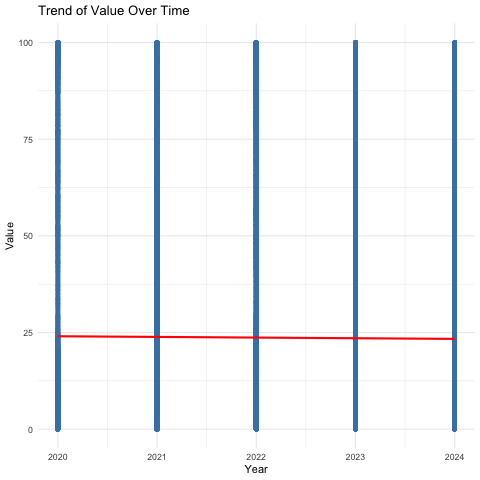

In [11]:
%%R


library(ggplot2)
ggplot(df_clean, aes(x = year, y = value)) +
  geom_point(alpha = 0.2, color = "steelblue") +   
  geom_smooth(method = "lm", color = "red", se = FALSE) +  
  labs(
    title = "Trend of Value Over Time",
    x = "Year",
    y = "Value"
  ) +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


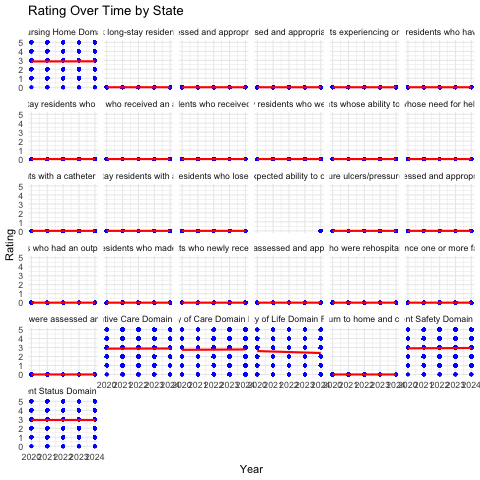

In [13]:
%%R 

ggplot(df, aes(x = year, y = rating)) +
  geom_point(color = "blue", alpha = 0.3, size = 1) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  facet_wrap(~ measure_description) +   
  labs(
    title = "Rating Over Time by State",
    x = "Year",
    y = "Rating"
  ) +
  theme_minimal()
